# Titanic 
this notebook represents our solution to kaggle Titanic competition



In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
train_df = pd.read_csv('./data/titanic/train.csv')  
train_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df = pd.read_csv('./data/titanic/test.csv')  
test_df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## preprocessing

### Name

we are able to extract the title from name of passenger, and we would get another group which would help us to group and fill missing values

In [6]:
title_extractor = lambda input: re.findall(r'([A-Za-z]+)\.',input)[0]
title_extractor("Mr.Boris")

'Mr'

In [7]:
print(f"Train:\n{test_df['Name'].apply(title_extractor).value_counts()}")

Train:
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64


In [8]:
print(f"\nTest:\n{train_df['Name'].apply(title_extractor).value_counts()}")


Test:
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64


In [9]:
titles = {
    "Mr": 1, 
    "Miss": 2, 
    "Mrs": 3, 
    "Master": 4, 
    "Dr": 4, 
    "Rev": 4, 
    "Col": 4, 
    "Major": 4, 
    "Mlle": 4,
    "Countess": 4,
    "Ms": 3, 
    "Lady": 3, 
    "Jonkheer": 4, 
    "Don": 4, 
    "Dona" : 3, 
    "Mme": 3,
    "Capt": 3,
    "Sir": 3 
}

title_mapper = lambda input: titles[title_extractor(input)]
title_mapper("Mr. Boris")


1

In [10]:
train_df['Title'] = train_df['Name'].apply(title_mapper)
train_df = train_df.drop(['Name'],axis=1)
train_df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  Title  
0           A/5 21171   7.2500   NaN        S      1  
1            PC 17599  71.2833   C85        C      3  
2    STON/O2. 3101282   7.9250   NaN        S      2  
3              113803  53.1000  C123        S      3  
4              373450   8.0500   NaN        S      1  
..                ...      ...   ...      ...    ...  
886            211536  13.0000   NaN        S      4  
887            112053  30.0000   B42        S      2  
888        W./C. 6607  23.4500   NaN        S      2  
889            111369  30.0000  C148        C      1  
890            370376   7.7500   NaN        Q      1  

[891 rows x 12 columns]

In [11]:
test_df['Title'] = test_df['Name'].apply(title_mapper)
test_df = test_df.drop(['Name'],axis=1)
test_df

PassengerId  Pclass     Sex   Age  SibSp  Parch              Ticket  \
0            892       3    male  34.5      0      0              330911   
1            893       3  female  47.0      1      0              363272   
2            894       2    male  62.0      0      0              240276   
3            895       3    male  27.0      0      0              315154   
4            896       3  female  22.0      1      1             3101298   
..           ...     ...     ...   ...    ...    ...                 ...   
413         1305       3    male   NaN      0      0           A.5. 3236   
414         1306       1  female  39.0      0      0            PC 17758   
415         1307       3    male  38.5      0      0  SOTON/O.Q. 3101262   
416         1308       3    male   NaN      0      0              359309   
417         1309       3    male   NaN      1      1                2668   

         Fare Cabin Embarked  Title  
0      7.8292   NaN        Q      1  
1      7.0000   NaN        S      3  
2      9.6875   NaN        Q      1  
3      8.6625   NaN        S      1  
4     12.2875   NaN        S      3  
..        ...   ...      ...    ...  
413    8.0500   NaN        S      1  
414  108.9000  C105        C      3  
415    7.2500   NaN        S      1  
416    8.0500   NaN        S      1  
417   22.3583   NaN        C      4  

[418 rows x 11 columns]

### Cabin

![Cabin structures](./media/cabins.gif)

according to above image, cabins were dependent on class so we can infer the cabin based on the class of the passanger

In [12]:
# we don't need to know excactly the number of the cabin is enough just first letter

get_cabin_letter = lambda input: input[:1] if input is not np.nan else np.nan

train_df['Cabin'] = train_df['Cabin'].apply(get_cabin_letter)
test_df['Cabin'] = test_df['Cabin'].apply(get_cabin_letter)


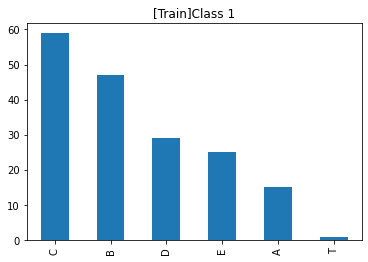

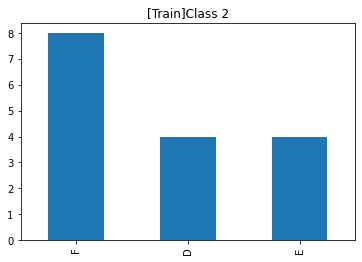

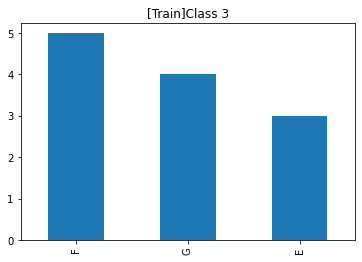

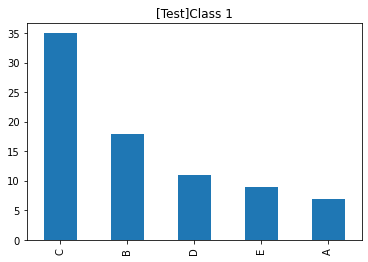

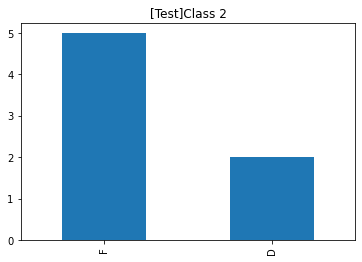

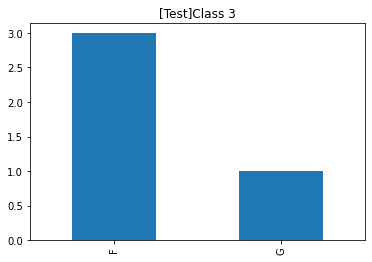

In [13]:
import matplotlib.pyplot as plt
train_df[train_df['Pclass']==1]['Cabin'].value_counts().plot(kind='bar')
plt.title('[Train]Class 1')
plt.show()

train_df[train_df['Pclass']==2]['Cabin'].value_counts().plot(kind='bar')
plt.title('[Train]Class 2')
plt.show()

train_df[train_df['Pclass']==3]['Cabin'].value_counts().plot(kind='bar')
plt.title('[Train]Class 3')
plt.show()


test_df[test_df['Pclass']==1]['Cabin'].value_counts().plot(kind='bar')
plt.title('[Test]Class 1')
plt.show()

test_df[test_df['Pclass']==2]['Cabin'].value_counts().plot(kind='bar')
plt.title('[Test]Class 2')
plt.show()

test_df[test_df['Pclass']==3]['Cabin'].value_counts().plot(kind='bar')
plt.title('[Test]Class 3')
plt.show()


In [14]:
# in the above plot we can clearly observe a distribution between the class and the cabin
# for example most of persons from the first class are in cabins [C,B]  and none from the class 2 or 3
# if we map this values to int we would be able to fill missing values by getting median of the class

print(train_df['Cabin'].unique()) 

cabin_map = {"A": 0.5, "B": 1, "C": 1.5, "D": 2, "E": 2.5, "F": 3, "G": 3.5, "T": 4}

to_number_mapper = lambda input: cabin_map[input] if input is not np.nan else np.nan

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [15]:
train_df['Cabin'] = train_df['Cabin'].apply(to_number_mapper)
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train_df


PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare  Cabin Embarked  Title  
0           A/5 21171   7.2500   3.00        S      1  
1            PC 17599  71.2833   1.50        C      3  
2    STON/O2. 3101282   7.9250   3.00        S      2  
3              113803  53.1000   1.50        S      3  
4              373450   8.0500   3.00        S      1  
..                ...      ...    ...      ...    ...  
886            211536  13.0000   2.75        S      4  
887            112053  30.0000   1.00        S      2  
888        W./C. 6607  23.4500   3.00        S      2  
889            111369  30.0000   1.50        C      1  
890            370376   7.7500   3.00        Q      1  

[891 rows x 12 columns]

In [16]:
test_df['Cabin'] = test_df['Cabin'].apply(to_number_mapper)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train_df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare  Cabin Embarked  Title  
0           A/5 21171   7.2500   3.00        S      1  
1            PC 17599  71.2833   1.50        C      3  
2    STON/O2. 3101282   7.9250   3.00        S      2  
3              113803  53.1000   1.50        S      3  
4              373450   8.0500   3.00        S      1  
..                ...      ...    ...      ...    ...  
886            211536  13.0000   2.75        S      4  
887            112053  30.0000   1.00        S      2  
888        W./C. 6607  23.4500   3.00        S      2  
889            111369  30.0000   1.50        C      1  
890            370376   7.7500   3.00        Q      1  

[891 rows x 12 columns]

### Age
we will fill the age missing values based on the title of the person, like this we will get most accurate fill for the values

In [17]:
train_df["Age"].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
train_df

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female  21.0      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare  Cabin Embarked  Title  
0           A/5 21171   7.2500   3.00        S      1  
1            PC 17599  71.2833   1.50        C      3  
2    STON/O2. 3101282   7.9250   3.00        S      2  
3              113803  53.1000   1.50        S      3  
4              373450   8.0500   3.00        S      1  
..                ...      ...    ...      ...    ...  
886            211536  13.0000   2.75        S      4  
887            112053  30.0000   1.00        S      2  
888        W./C. 6607  23.4500   3.00        S      2  
889            111369  30.0000   1.50        C      1  
890            370376   7.7500   3.00        Q      1  

[891 rows x 12 columns]

In [18]:
test_df["Age"].fillna(test_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df

PassengerId  Pclass     Sex   Age  SibSp  Parch              Ticket  \
0            892       3    male  34.5      0      0              330911   
1            893       3  female  47.0      1      0              363272   
2            894       2    male  62.0      0      0              240276   
3            895       3    male  27.0      0      0              315154   
4            896       3  female  22.0      1      1             3101298   
..           ...     ...     ...   ...    ...    ...                 ...   
413         1305       3    male  28.5      0      0           A.5. 3236   
414         1306       1  female  39.0      0      0            PC 17758   
415         1307       3    male  38.5      0      0  SOTON/O.Q. 3101262   
416         1308       3    male  28.5      0      0              359309   
417         1309       3    male   9.5      1      1                2668   

         Fare  Cabin Embarked  Title  
0      7.8292    3.0        Q      1  
1      7.0000    3.0        S      3  
2      9.6875    3.0        Q      1  
3      8.6625    3.0        S      1  
4     12.2875    3.0        S      3  
..        ...    ...      ...    ...  
413    8.0500    3.0        S      1  
414  108.9000    1.5        C      3  
415    7.2500    3.0        S      1  
416    8.0500    3.0        S      1  
417   22.3583    3.0        C      4  

[418 rows x 11 columns]

## Sex
For this field we will apply only ordinal encoding

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

encoded = ordinal_encoder.fit_transform(train_df['Sex'].to_numpy().reshape(-1,1))
train_df['Sex'] = encoded.reshape(-1)


In [20]:
train_df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3  1.0  22.0      1      0         A/5 21171   
1              2         1       1  0.0  38.0      1      0          PC 17599   
2              3         1       3  0.0  26.0      0      0  STON/O2. 3101282   
3              4         1       1  0.0  35.0      1      0            113803   
4              5         0       3  1.0  35.0      0      0            373450   
..           ...       ...     ...  ...   ...    ...    ...               ...   
886          887         0       2  1.0  27.0      0      0            211536   
887          888         1       1  0.0  19.0      0      0            112053   
888          889         0       3  0.0  21.0      1      2        W./C. 6607   
889          890         1       1  1.0  26.0      0      0            111369   
890          891         0       3  1.0  32.0      0      0            370376   

        Fare  Cabin Embarked  Title  
0     7.2500   3.00        S      1  
1    71.2833   1.50        C      3  
2     7.9250   3.00        S      2  
3    53.1000   1.50        S      3  
4     8.0500   3.00        S      1  
..       ...    ...      ...    ...  
886  13.0000   2.75        S      4  
887  30.0000   1.00        S      2  
888  23.4500   3.00        S      2  
889  30.0000   1.50        C      1  
890   7.7500   3.00        Q      1  

[891 rows x 12 columns]

In [21]:
encoded = ordinal_encoder.fit_transform(test_df['Sex'].to_numpy().reshape(-1,1))
test_df['Sex'] = encoded.reshape(-1)

In [22]:
test_df

PassengerId  Pclass  Sex   Age  SibSp  Parch              Ticket  \
0            892       3  1.0  34.5      0      0              330911   
1            893       3  0.0  47.0      1      0              363272   
2            894       2  1.0  62.0      0      0              240276   
3            895       3  1.0  27.0      0      0              315154   
4            896       3  0.0  22.0      1      1             3101298   
..           ...     ...  ...   ...    ...    ...                 ...   
413         1305       3  1.0  28.5      0      0           A.5. 3236   
414         1306       1  0.0  39.0      0      0            PC 17758   
415         1307       3  1.0  38.5      0      0  SOTON/O.Q. 3101262   
416         1308       3  1.0  28.5      0      0              359309   
417         1309       3  1.0   9.5      1      1                2668   

         Fare  Cabin Embarked  Title  
0      7.8292    3.0        Q      1  
1      7.0000    3.0        S      3  
2      9.6875    3.0        Q      1  
3      8.6625    3.0        S      1  
4     12.2875    3.0        S      3  
..        ...    ...      ...    ...  
413    8.0500    3.0        S      1  
414  108.9000    1.5        C      3  
415    7.2500    3.0        S      1  
416    8.0500    3.0        S      1  
417   22.3583    3.0        C      4  

[418 rows x 11 columns]

## Embarked
we assume that we have some distance between these values, so we will apply here OneHotEncoding, before that we have to fill missing values for this we will also assume that this fields depends on the class of passanger

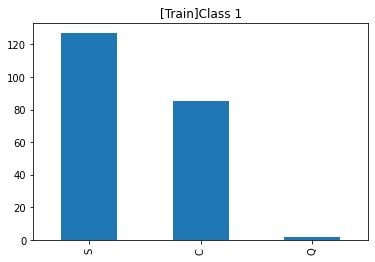

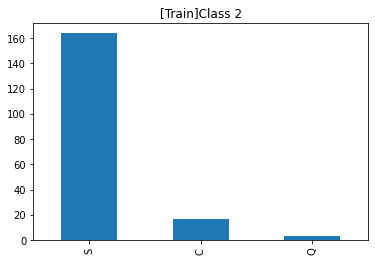

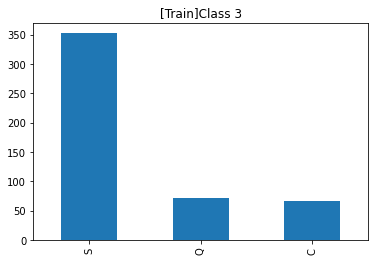

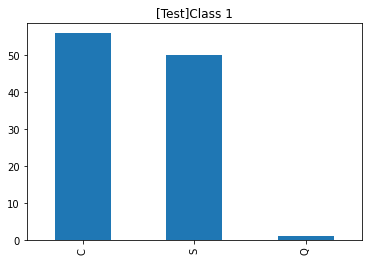

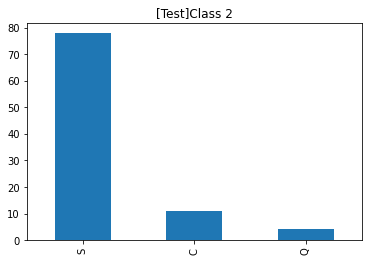

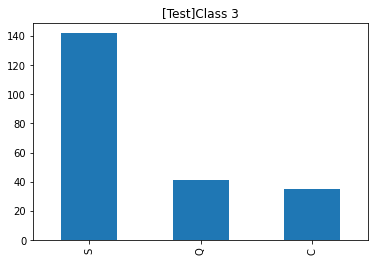

In [23]:

train_df[train_df['Pclass']==1]['Embarked'].value_counts().plot(kind='bar')
plt.title('[Train]Class 1')
plt.show()

train_df[train_df['Pclass']==2]['Embarked'].value_counts().plot(kind='bar')
plt.title('[Train]Class 2')
plt.show()


train_df[train_df['Pclass']==3]['Embarked'].value_counts().plot(kind='bar')
plt.title('[Train]Class 3')
plt.show()


test_df[test_df['Pclass']==1]['Embarked'].value_counts().plot(kind='bar')
plt.title('[Test]Class 1')
plt.show()

test_df[test_df['Pclass']==2]['Embarked'].value_counts().plot(kind='bar')
plt.title('[Test]Class 2')
plt.show()


test_df[test_df['Pclass']==3]['Embarked'].value_counts().plot(kind='bar')
plt.title('[Test]Class 3')
plt.show()



In [24]:
# So in most of the cases passanger are emberked from Southampton
# we will missing vaues with S 
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [25]:
encoded = ordinal_encoder.fit_transform(train_df['Embarked'].to_numpy().reshape(-1,1))
train_df['Embarked'] = encoded.reshape(-1,1)

In [26]:
encoded = ordinal_encoder.fit_transform(test_df['Embarked'].to_numpy().reshape(-1,1))
test_df['Embarked'] = encoded.reshape(-1,1)

In [27]:
train_df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3  1.0  22.0      1      0         A/5 21171   
1              2         1       1  0.0  38.0      1      0          PC 17599   
2              3         1       3  0.0  26.0      0      0  STON/O2. 3101282   
3              4         1       1  0.0  35.0      1      0            113803   
4              5         0       3  1.0  35.0      0      0            373450   
..           ...       ...     ...  ...   ...    ...    ...               ...   
886          887         0       2  1.0  27.0      0      0            211536   
887          888         1       1  0.0  19.0      0      0            112053   
888          889         0       3  0.0  21.0      1      2        W./C. 6607   
889          890         1       1  1.0  26.0      0      0            111369   
890          891         0       3  1.0  32.0      0      0            370376   

        Fare  Cabin  Embarked  Title  
0     7.2500   3.00       2.0      1  
1    71.2833   1.50       0.0      3  
2     7.9250   3.00       2.0      2  
3    53.1000   1.50       2.0      3  
4     8.0500   3.00       2.0      1  
..       ...    ...       ...    ...  
886  13.0000   2.75       2.0      4  
887  30.0000   1.00       2.0      2  
888  23.4500   3.00       2.0      2  
889  30.0000   1.50       0.0      1  
890   7.7500   3.00       1.0      1  

[891 rows x 12 columns]

In [28]:
test_df

PassengerId  Pclass  Sex   Age  SibSp  Parch              Ticket  \
0            892       3  1.0  34.5      0      0              330911   
1            893       3  0.0  47.0      1      0              363272   
2            894       2  1.0  62.0      0      0              240276   
3            895       3  1.0  27.0      0      0              315154   
4            896       3  0.0  22.0      1      1             3101298   
..           ...     ...  ...   ...    ...    ...                 ...   
413         1305       3  1.0  28.5      0      0           A.5. 3236   
414         1306       1  0.0  39.0      0      0            PC 17758   
415         1307       3  1.0  38.5      0      0  SOTON/O.Q. 3101262   
416         1308       3  1.0  28.5      0      0              359309   
417         1309       3  1.0   9.5      1      1                2668   

         Fare  Cabin  Embarked  Title  
0      7.8292    3.0       1.0      1  
1      7.0000    3.0       2.0      3  
2      9.6875    3.0       1.0      1  
3      8.6625    3.0       2.0      1  
4     12.2875    3.0       2.0      3  
..        ...    ...       ...    ...  
413    8.0500    3.0       2.0      1  
414  108.9000    1.5       0.0      3  
415    7.2500    3.0       2.0      1  
416    8.0500    3.0       2.0      1  
417   22.3583    3.0       0.0      4  

[418 rows x 11 columns]

### Fare
here we also fill the missing values based on the class

In [29]:
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [30]:
train_df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3  1.0  22.0      1      0         A/5 21171   
1              2         1       1  0.0  38.0      1      0          PC 17599   
2              3         1       3  0.0  26.0      0      0  STON/O2. 3101282   
3              4         1       1  0.0  35.0      1      0            113803   
4              5         0       3  1.0  35.0      0      0            373450   
..           ...       ...     ...  ...   ...    ...    ...               ...   
886          887         0       2  1.0  27.0      0      0            211536   
887          888         1       1  0.0  19.0      0      0            112053   
888          889         0       3  0.0  21.0      1      2        W./C. 6607   
889          890         1       1  1.0  26.0      0      0            111369   
890          891         0       3  1.0  32.0      0      0            370376   

        Fare  Cabin  Embarked  Title  
0     7.2500   3.00       2.0      1  
1    71.2833   1.50       0.0      3  
2     7.9250   3.00       2.0      2  
3    53.1000   1.50       2.0      3  
4     8.0500   3.00       2.0      1  
..       ...    ...       ...    ...  
886  13.0000   2.75       2.0      4  
887  30.0000   1.00       2.0      2  
888  23.4500   3.00       2.0      2  
889  30.0000   1.50       0.0      1  
890   7.7500   3.00       1.0      1  

[891 rows x 12 columns]

In [31]:
test_df

PassengerId  Pclass  Sex   Age  SibSp  Parch              Ticket  \
0            892       3  1.0  34.5      0      0              330911   
1            893       3  0.0  47.0      1      0              363272   
2            894       2  1.0  62.0      0      0              240276   
3            895       3  1.0  27.0      0      0              315154   
4            896       3  0.0  22.0      1      1             3101298   
..           ...     ...  ...   ...    ...    ...                 ...   
413         1305       3  1.0  28.5      0      0           A.5. 3236   
414         1306       1  0.0  39.0      0      0            PC 17758   
415         1307       3  1.0  38.5      0      0  SOTON/O.Q. 3101262   
416         1308       3  1.0  28.5      0      0              359309   
417         1309       3  1.0   9.5      1      1                2668   

         Fare  Cabin  Embarked  Title  
0      7.8292    3.0       1.0      1  
1      7.0000    3.0       2.0      3  
2      9.6875    3.0       1.0      1  
3      8.6625    3.0       2.0      1  
4     12.2875    3.0       2.0      3  
..        ...    ...       ...    ...  
413    8.0500    3.0       2.0      1  
414  108.9000    1.5       0.0      3  
415    7.2500    3.0       2.0      1  
416    8.0500    3.0       2.0      1  
417   22.3583    3.0       0.0      4  

[418 rows x 11 columns]

## Normalization

In [32]:
train_y = train_df['Survived']
train_df = train_df.drop(['PassengerId','Ticket','Survived'],axis=1)

test_df = test_df.drop(['PassengerId','Ticket'],axis=1)

In [33]:
train_df

Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked  Title
0         3  1.0  22.0      1      0   7.2500   3.00       2.0      1
1         1  0.0  38.0      1      0  71.2833   1.50       0.0      3
2         3  0.0  26.0      0      0   7.9250   3.00       2.0      2
3         1  0.0  35.0      1      0  53.1000   1.50       2.0      3
4         3  1.0  35.0      0      0   8.0500   3.00       2.0      1
..      ...  ...   ...    ...    ...      ...    ...       ...    ...
886       2  1.0  27.0      0      0  13.0000   2.75       2.0      4
887       1  0.0  19.0      0      0  30.0000   1.00       2.0      2
888       3  0.0  21.0      1      2  23.4500   3.00       2.0      2
889       1  1.0  26.0      0      0  30.0000   1.50       0.0      1
890       3  1.0  32.0      0      0   7.7500   3.00       1.0      1

[891 rows x 9 columns]

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#   train
scaled_age = scaler.fit_transform(train_df['Age'].to_numpy().reshape(-1,1))
scaled_fare = scaler.fit_transform(train_df['Fare'].to_numpy().reshape(-1,1))
train_df['Age'] = scaled_age.reshape(-1,1)
train_df['Fare'] = scaled_fare.reshape(-1,1)

In [35]:
# test
scaled_age = scaler.fit_transform(test_df['Age'].to_numpy().reshape(-1,1))
scaled_fare = scaler.fit_transform(test_df['Fare'].to_numpy().reshape(-1,1))
test_df['Age'] = scaled_age.reshape(-1,1)
test_df['Fare'] = scaled_fare.reshape(-1,1)

In [36]:
train_df

Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  Title
0         3  1.0  0.271174      1      0  0.014151   3.00       2.0      1
1         1  0.0  0.472229      1      0  0.139136   1.50       0.0      3
2         3  0.0  0.321438      0      0  0.015469   3.00       2.0      2
3         1  0.0  0.434531      1      0  0.103644   1.50       2.0      3
4         3  1.0  0.434531      0      0  0.015713   3.00       2.0      1
..      ...  ...       ...    ...    ...       ...    ...       ...    ...
886       2  1.0  0.334004      0      0  0.025374   2.75       2.0      4
887       1  0.0  0.233476      0      0  0.058556   1.00       2.0      2
888       3  0.0  0.258608      1      2  0.045771   3.00       2.0      2
889       1  1.0  0.321438      0      0  0.058556   1.50       0.0      1
890       3  1.0  0.396833      0      0  0.015127   3.00       1.0      1

[891 rows x 9 columns]

## Training


## svm
kaggle score for this model is ``` 0.77990 ```

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,5,10,15,20], 
          'gamma': [0.05 ,0.06 ,0.07 ,0.08,0.09,0.1],
          'kernel':['rbf','linear']
          }
          
svc = SVC()
grid = GridSearchCV(estimator=svc, param_grid=parameters,cv=5)
grid.fit(train_df,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
                         'kernel': ['rbf', 'linear']})

In [48]:
grid.best_estimator_

SVC(C=20, gamma=0.05)

In [49]:
test_y = pd.read_csv('./data/titanic/gender_submission.csv')['Survived'].to_numpy()
predictions = grid.predict(test_df)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       266
           1       0.88      0.94      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



In [55]:

indexes = [ i for i in range(892,1310,1)]
ids = pd.DataFrame(indexes, columns=['PassengerId'])
prds = pd.DataFrame(predictions,columns=['Survived'])
ids.join(prds).to_csv('results_svm.csv',index=False)